In [20]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [21]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

In [22]:
y_train = train_data['label'].values
x_train = train_data.drop('label',axis=1).values
x_test = test_data.values
x_test = torch.FloatTensor(x_test)

In [23]:
class Model(nn.Module):

    def __init__(self, ip_size, op_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(ip_size, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, op_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
input_size = 784
output_size = 10
learning_rate = 0.001
batch_size = 64
epochs = 20
tr_ds = 'Training Dataset'
te_ds = 'Test Dataset'

In [26]:
train_dataset = TensorDataset(torch.FloatTensor(x_train), torch.LongTensor(y_train))
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(torch.FloatTensor(x_test))
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [27]:
model = Model(input_size, output_size).to(device=device)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
def check_accuracy(loader, model):
    correct = 0
    samples = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0],-1)

            y_pred = model(x)
            _, y_pred = y_pred.max(1)
            correct += (y_pred == y).sum()
            samples += y_pred.size(0)


        print(f'Accuracy is {correct} / {samples} = {(correct/samples) * 100:.2f}')
    model.train()

Accuracy is 5192 / 42000 = 12.36
Epoch: 0 and Loss: 0.270361
Accuracy is 40145 / 42000 = 95.58
Epoch: 1 and Loss: 0.133724
Accuracy is 40930 / 42000 = 97.45
Epoch: 2 and Loss: 0.098218
Accuracy is 40754 / 42000 = 97.03
Epoch: 3 and Loss: 0.080090
Accuracy is 41293 / 42000 = 98.32
Epoch: 4 and Loss: 0.071482
Accuracy is 41375 / 42000 = 98.51
Epoch: 5 and Loss: 0.064902
Accuracy is 41545 / 42000 = 98.92
Epoch: 6 and Loss: 0.054948
Accuracy is 41377 / 42000 = 98.52
Epoch: 7 and Loss: 0.051480
Accuracy is 41457 / 42000 = 98.71
Epoch: 8 and Loss: 0.045996
Accuracy is 41521 / 42000 = 98.86
Epoch: 9 and Loss: 0.050738
Accuracy is 41566 / 42000 = 98.97
Epoch: 10 and Loss: 0.038872
Accuracy is 41525 / 42000 = 98.87
Epoch: 11 and Loss: 0.033285
Accuracy is 41499 / 42000 = 98.81
Epoch: 12 and Loss: 0.039735
Accuracy is 41574 / 42000 = 98.99
Epoch: 13 and Loss: 0.035266
Accuracy is 41676 / 42000 = 99.23
Epoch: 14 and Loss: 0.029638
Accuracy is 41717 / 42000 = 99.33
Epoch: 15 and Loss: 0.030285
Acc

Text(0.5, 0, 'epoch')

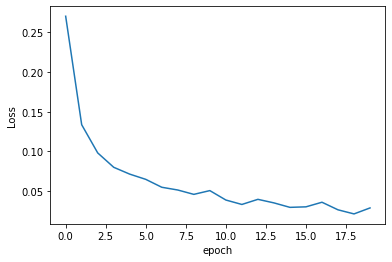

In [30]:
losses = []

for epoch in range(epochs):
    batch_count = 0
    total_loss = 0
    check_accuracy(train_loader, model)
    for batch_index, (data,targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        y_pred = model(data)
        loss = criterion(y_pred, targets)

        total_loss += loss.item()
        batch_count += 1

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss/batch_count
    print(f'Epoch: {epoch} and Loss: {avg_loss:.6f}')


    losses.append(round(avg_loss,6))

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [31]:
check_accuracy(train_loader, model)

Accuracy is 41547 / 42000 = 98.92


In [32]:
y_pred = model(x_test)
y_pred = torch.argmax(y_pred,dim=1)

In [33]:
print(y_pred)
print(y_pred.shape)

tensor([2, 0, 9,  ..., 3, 9, 2])
torch.Size([28000])


In [34]:
op = pd.DataFrame(y_pred.detach().numpy())

In [35]:
op.rename( columns={0 :'Label'}, inplace=True )
op['ImageId'] = op.index + 1
op = op[['ImageId','Label']]

In [36]:
op.to_csv('output.csv', index=False, header=True)

In [37]:
df = pd.read_csv('output.csv')
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [38]:
# Final Score was 0.99628 ranked 88th